In [19]:
# Importing all necessary Libaries: Data Science Packages

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Train_data

In [82]:
train = pd.read_csv('Train-1617360447408-1660719685476.csv', na_values=["?"])

In [83]:
train.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,1,9,1,1,4,783,403,585,585,32.970966,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,1,12,0,0,0,564,788,569,569,94.116731,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,2,24,0,0,5,574,403,585,585,64.138297,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,0,14,0,0,0,401,783,250,250,13.832428,7,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,1,11,0,0,0,311,276,300,300,82.898368,9,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1


In [84]:
train.shape

(66587, 49)

# test_data

In [85]:
test = pd.read_csv('test-1617360461595-1660719701431.csv',na_values=["?"])
test.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),NaN,3,NaN,45,3,10,0,0,1,786,414,410,410,63.103503,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),NaN,2,NaN,10,1,16,1,0,0,600,788,401,401,20.808508,5,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),NaN,11,InternalMedicine,41,1,15,0,0,1,584,996,599,599,93.791724,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),NaN,1,InternalMedicine,71,2,11,0,0,0,38,496,276,276,66.935187,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),NaN,7,InternalMedicine,59,2,18,0,0,0,593,591,250.6,250.6,41.437377,7,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


In [86]:
train['index'].nunique(), train['patient_id'].nunique() , train['index'].nunique()

(48911, 39650, 48911)

In [87]:
num = [feature for feature in train.columns if train[feature].dtypes != 'O']
for feature in num :
    null = (train[feature].isnull().sum())
    if null[null>0] :
            print(feature, null)


C:\Users\pramod\AppData\Local\Temp/ipykernel_36984/3850784220.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if null[null>0] :


In [88]:
cat = [feature for feature in train.columns if train[feature].dtypes == 'O']
for feature in cat :
        null = (train[feature].isnull().sum())
        if null[null>0] :
            print(feature, null)
    

race 1504
weight 64454
medical_specialty 32672
diag_1 15
diag_2 231
diag_3 954
diag_4 954


C:\Users\pramod\AppData\Local\Temp/ipykernel_36984/3908253134.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if null[null>0] :


In [89]:
cols = ['weight', 'medical_specialty', 'encounter_id', 'index', 'readmitted', 'patient_id']
tcols = ['weight', 'medical_specialty', 'encounter_id', 'index', 'patient_id']
train1 = train.drop(cols, axis = 1)
test1 = test.drop(tcols, axis = 1)

In [90]:
train1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,783,403,585,585,32.970966,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,564,788,569,569,94.116731,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,574,403,585,585,64.138297,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,401,783,250,250,13.832428,7,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,311,276,300,300,82.898368,9,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [255]:
categ = [feature for feature in train1.columns if train1[feature].dtypes == 'O']

In [129]:
numerical = [feature for feature in train1.columns if feature not in categ]

In [130]:
train1.shape , test1.shape

((66587, 43), (16647, 43))

# Imputation

<AxesSubplot:>

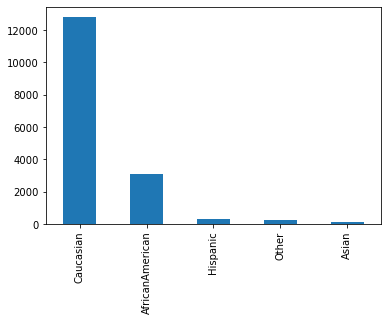

In [191]:
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(variables= categ , imputation_method = 'frequent')

# fit the imputer
imputer.fit(train1)
# transform the data
train2= imputer.transform(train1)
test2= imputer.transform(test1)

test2['race'].value_counts().plot.bar()


In [192]:
from sklearn.impute import  SimpleImputer
imputer = SimpleImputer()
imputer.fit(train2[numerical])
train2[numerical] = imputer.transform(train2[numerical])
test2[numerical] = imputer.transform(test[numerical])

In [194]:
cate = [feature for feature in train2.columns if train2[feature].dtypes == 'O']
cate
for val in cate :
    print(val,  train2[val].nunique())
    print(val,  train2[val].value_counts(normalize= True))

race 5
race Caucasian          0.772073
AfricanAmerican    0.186313
Hispanic           0.019719
Other              0.015769
Asian              0.006127
Name: race, dtype: float64
gender 3
gender Female             0.540241
Male               0.459729
Unknown/Invalid    0.000030
Name: gender, dtype: float64
age 10
age [70-80)     0.255771
[60-70)     0.222941
[50-60)     0.170874
[80-90)     0.166399
[40-50)     0.094973
[30-40)     0.036253
[90-100)    0.027528
[20-30)     0.017331
[10-20)     0.006428
[0-10)      0.001502
Name: age, dtype: float64
diag_1 651
diag_1 428    0.068767
414    0.062820
786    0.039933
410    0.035773
486    0.033535
         ...   
939    0.000015
52     0.000015
334    0.000015
385    0.000015
862    0.000015
Name: diag_1, Length: 651, dtype: float64
diag_2 655
diag_2 276    0.069848
428    0.065658
250    0.061574
427    0.048959
401    0.035608
         ...   
942    0.000015
35     0.000015
658    0.000015
702    0.000015
78     0.000015
Name: diag_2, L

# OneHotEncoder

In [195]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder( top_categories=2, variables=['gender', 'diabetesMed'], drop_last=False)

# fit the encoder
encoder.fit(train2)

# transform the data
train3 = encoder.transform(train2)
test3 = encoder.transform(test2)

encoder.encoder_dict_

{'gender': ['Female', 'Male'], 'diabetesMed': ['Yes', 'No']}

In [197]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder( top_categories=4, variables=['race'], drop_last=False)

# fit the encoder
encoder.fit(train3)

# transform the data
train4 = encoder.transform(train3)
test4 = encoder.transform(test3)

encoder.encoder_dict_

{'race': ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Other']}

In [199]:
train4.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,gender_Female,gender_Male,diabetesMed_Yes,diabetesMed_No,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Other
0,[80-90),4.0,39.0,1.0,9.0,1.0,1.0,4.0,783,403,585,585,32.970966,9.0,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,1,0,0,0,1,0
1,[60-70),3.0,34.0,1.0,12.0,0.0,0.0,0.0,564,788,569,569,94.116731,6.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,1,1,0,0,0
2,[50-60),6.0,50.0,2.0,24.0,0.0,0.0,5.0,574,403,585,585,64.138297,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,1,0,1,0,1,0,0,0
3,[70-80),5.0,63.0,0.0,14.0,0.0,0.0,0.0,401,783,250,250,13.832428,7.0,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,1,0,1,0,0,1,0,0
4,[70-80),9.0,17.0,1.0,11.0,0.0,0.0,0.0,311,276,300,300,82.898368,9.0,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,1,1,0,0,0


In [200]:
test4.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,gender_Female,gender_Male,diabetesMed_Yes,diabetesMed_No,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Other
0,[70-80),3.0,45.0,3.0,10.0,0.0,0.0,1.0,786,414,410,410,63.103503,8.0,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,1,0,1,0,0,0
1,[60-70),2.0,10.0,1.0,16.0,1.0,0.0,0.0,600,788,401,401,20.808508,5.0,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,1,0,1,0,0,0
2,[70-80),11.0,41.0,1.0,15.0,0.0,0.0,1.0,584,996,599,599,93.791724,9.0,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,0,1,1,0,0,1,0,0
3,[70-80),1.0,71.0,2.0,11.0,0.0,0.0,0.0,38,496,276,276,66.935187,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,1,1,0,0,0
4,[50-60),7.0,59.0,2.0,18.0,0.0,0.0,0.0,593,591,250.6,250.6,41.437377,7.0,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,1,0,1,0,0,1,0,0


In [256]:
y = train['readmitted']

In [202]:
cats = [feature for feature in train4.columns if train4[feature].dtypes == 'O'] 
for val in cats :
    print(val,  train4[val].nunique())
    #print(val,  train4[val].value_counts(normalize= True))

age 10
diag_1 651
diag_2 655
diag_3 706
diag_4 706
X1 4
X2 4
X3 4
X4 4
X5 4
X6 3
X7 4
X8 1
X9 4
X10 4
X11 2
X12 4
X13 4
X14 4
X15 3
X16 2
X17 2
X18 1
X19 1
X20 4
X21 4
X22 2
X23 2
X24 2
X25 1
change 2


# OrdinalEncoder

In [203]:
test4['age'].mode()

0    [70-80)
Name: age, dtype: object

In [204]:
test4['age'].value_counts()

[70-80)     4200
[60-70)     3726
[50-60)     2839
[80-90)     2781
[40-50)     1628
[30-40)      615
[90-100)     428
[20-30)      289
[10-20)      123
[0-10)        18
Name: age, dtype: int64

In [206]:
train4.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,gender_Female,gender_Male,diabetesMed_Yes,diabetesMed_No,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Other
0,8.0,4.0,39.0,1.0,9.0,1.0,1.0,4.0,503.0,219.0,367.0,367.0,32.970966,9.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0,1,0
1,6.0,3.0,34.0,1.0,12.0,0.0,0.0,0.0,362.0,469.0,350.0,350.0,94.116731,6.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1,0,0,0
2,5.0,6.0,50.0,2.0,24.0,0.0,0.0,5.0,373.0,219.0,367.0,367.0,64.138297,9.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0
3,7.0,5.0,63.0,0.0,14.0,0.0,0.0,0.0,236.0,464.0,73.0,73.0,13.832428,7.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0
4,7.0,9.0,17.0,1.0,11.0,0.0,0.0,0.0,170.0,119.0,148.0,148.0,82.898368,9.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1,0,0,0


In [217]:
from sklearn.preprocessing import OrdinalEncoder
order = OrdinalEncoder(handle_unknown = 'use_encoded_value' , unknown_value  = 1000)
order.fit(train4[cats], y)
train4[cats] = order.transform(train4[cats])
test4[cats] = order.transform(test4[cats])

In [220]:
test4.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,change,gender_Female,gender_Male,diabetesMed_Yes,diabetesMed_No,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Other
0,1000.0,3.0,45.0,3.0,10.0,0.0,0.0,1.0,1000.0,1000.0,1000.0,1000.0,63.103503,8.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1,0,1,0,1,0,0,0
1,1000.0,2.0,10.0,1.0,16.0,1.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,20.808508,5.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0,1,1,0,1,0,0,0
2,1000.0,11.0,41.0,1.0,15.0,0.0,0.0,1.0,1000.0,1000.0,1000.0,1000.0,93.791724,9.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0,1,1,0,0,1,0,0
3,1000.0,1.0,71.0,2.0,11.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,66.935187,9.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1,0,0,1,1,0,0,0
4,1000.0,7.0,59.0,2.0,18.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,41.437377,7.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1,0,1,0,0,1,0,0


In [221]:
train4.shape, test4.shape

((66587, 48), (16647, 48))

In [223]:
X = train4.copy() 
y = train['readmitted']

# train_test_split

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)

In [225]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(53269, 48)
(13318, 48)
(53269,)
(13318,)


In [226]:
y_train.value_counts(normalize= True), y_val.value_counts(normalize= True)

(0    0.537986
 1    0.462014
 Name: readmitted, dtype: float64,
 0    0.537994
 1    0.462006
 Name: readmitted, dtype: float64)

# LogisticRegression

In [227]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [228]:
y_pred_val = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.62


In [229]:
y_pred_tr = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.61


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      7165
           1       0.65      0.39      0.48      6153

    accuracy                           0.62     13318
   macro avg       0.63      0.60      0.59     13318
weighted avg       0.63      0.62      0.60     13318



In [231]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_tr)
print(confusion_matrix)

[[23312  5346]
 [15187  9424]]


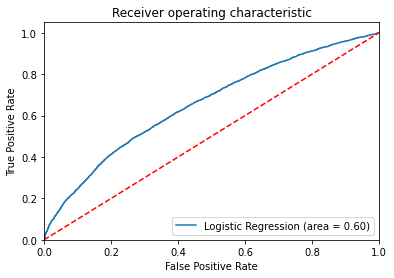

In [232]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# DecisionTreeClassifier

In [233]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

# classification_report on train data

In [234]:
y_pred_train_gini = clf_gini.predict(X_train)
print(classification_report(y_train, y_pred_train_gini))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     28658
           1       0.88      0.87      0.87     24611

    accuracy                           0.88     53269
   macro avg       0.88      0.88      0.88     53269
weighted avg       0.88      0.88      0.88     53269



In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_gini)

array([[25673,  2985],
       [ 3300, 21311]], dtype=int64)

# classification_report on validation data

In [236]:
y_pred_val_gini = clf_gini.predict(X_val)
print(classification_report(y_val, y_pred_val_gini))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7165
           1       0.67      0.66      0.66      6153

    accuracy                           0.69     13318
   macro avg       0.69      0.69      0.69     13318
weighted avg       0.69      0.69      0.69     13318



In [237]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_val_gini)

array([[5121, 2044],
       [2075, 4078]], dtype=int64)

# RandomForestClassifier

In [238]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200,criterion = 'gini', max_depth= 20 , max_features= 'log2')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=200)

In [239]:
y_pred_train_rf = rf.predict(X_train)
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28658
           1       0.98      0.92      0.95     24611

    accuracy                           0.95     53269
   macro avg       0.96      0.95      0.95     53269
weighted avg       0.95      0.95      0.95     53269



In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_rf)

array([[28100,   558],
       [ 1898, 22713]], dtype=int64)

In [241]:
y_pred_val_rf = rf.predict(X_val)
print(classification_report(y_val, y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      7165
           1       0.78      0.66      0.71      6153

    accuracy                           0.76     13318
   macro avg       0.76      0.75      0.75     13318
weighted avg       0.76      0.76      0.75     13318



In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_val_rf)

array([[5941, 1224],
       [1878, 4275]], dtype=int64)

# Prediction on test data

In [249]:
test_pred = rf.predict(test4)

# sample_submission

In [250]:
prediction = pd.DataFrame(test_pred, columns=['predictions']).to_csv('prediction.csv')

In [254]:
sample_submission = pd.read_csv('prediction.csv')

submission = sample_submission.drop('Unnamed: 0', axis = 1)
submission.head()

,predictions
0,0
1,0
2,0
3,0
4,1


# XGBClassifier

In [44]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators =200, max_depth  = 15, learning_rate = 0.6, reg_lambda  = 0.3  )

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0.3, ...)

In [45]:
y_pred_train_xgb_model = xgb_model.predict(X_train)
print(classification_report(y_train, y_pred_train_xgb_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28658
           1       1.00      1.00      1.00     24611

    accuracy                           1.00     53269
   macro avg       1.00      1.00      1.00     53269
weighted avg       1.00      1.00      1.00     53269



In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_xgb_model)

array([[28658,     0],
       [    0, 24611]], dtype=int64)

In [46]:
y_pred_val_xgb_model = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred_val_xgb_model))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      7165
           1       0.75      0.73      0.74      6153

    accuracy                           0.77     13318
   macro avg       0.77      0.76      0.76     13318
weighted avg       0.77      0.77      0.77     13318



# SVC

In [48]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [50]:
y_pred_train_svm = svm.predict(X_train)
print(classification_report(y_train, y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67     28658
           1       0.60      0.48      0.53     24611

    accuracy                           0.61     53269
   macro avg       0.61      0.60      0.60     53269
weighted avg       0.61      0.61      0.61     53269



In [51]:
y_pred_val_svm = svm.predict(X_val)
print(classification_report(y_val, y_pred_val_svm))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      7165
           1       0.61      0.49      0.54      6153

    accuracy                           0.62     13318
   macro avg       0.61      0.61      0.61     13318
weighted avg       0.62      0.62      0.61     13318

